# WITH PANDAS AND MATPLOTLIB

In [221]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [222]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")
df = kill.copy()

## 1: Plot number of people by gender

In [223]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [224]:
df["race"].value_counts(dropna=False)

race
W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: count, dtype: int64

In [225]:
gender = df.groupby('gender')["gender"].count().sort_values(ascending=False).index
gender

Index(['M', 'F'], dtype='object', name='gender')

In [226]:
gender_distribution = df.groupby('gender')["gender"].count().sort_values(ascending=False)
gender_distribution

gender
M    2428
F     107
Name: gender, dtype: int64

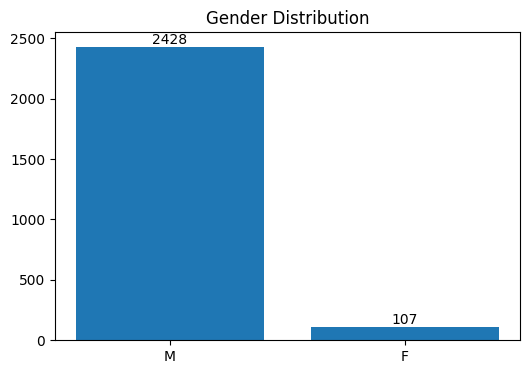

In [227]:
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(gender, gender_distribution)

for i in range(len(gender)):
        plt.text(i,gender_distribution[i],gender_distribution[i],  horizontalalignment='center',
     verticalalignment='bottom')
ax.set_title('Gender Distribution')

plt.show()

In [228]:
# with matplotlib


## 2: Plot 7 most common kill weapons

In [229]:
armed_values = df.groupby("armed")["armed"].count().sort_values(ascending=False).head(7)
armed_values

armed
gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
Name: armed, dtype: int64

In [230]:
armed_text = df.groupby("armed")["armed"].count().sort_values(ascending=False).head(7).index
armed_text

Index(['gun', 'knife', 'vehicle', 'unarmed', 'undetermined', 'toy weapon',
       'unknown weapon'],
      dtype='object', name='armed')

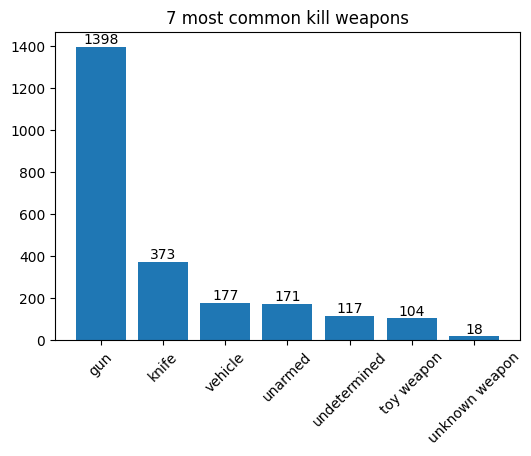

In [231]:
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(armed_text, armed_values)

for i in range(len(armed_text)):
        plt.text(i,armed_values[i],armed_values[i],  horizontalalignment='center',
     verticalalignment='bottom')
ax.set_title('7 most common kill weapons')

ax.set_xticklabels( armed_text, rotation=45 ) ;

plt.show()

In [232]:
# with matplotlib


## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [233]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [234]:
df["age_cat"] = df["age"].apply(lambda x: "above25" if x > 25 else "below25")
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False,above25
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False,below25
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False,above25
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True,above25


In [235]:
age_cat_value = df.groupby('age_cat')['age_cat'].count()
age_cat_value

age_cat
above25    1905
below25     630
Name: age_cat, dtype: int64

In [236]:
age_cat_value_index = df.groupby('age_cat')['age_cat'].count().index
age_cat_value_index

Index(['above25', 'below25'], dtype='object', name='age_cat')

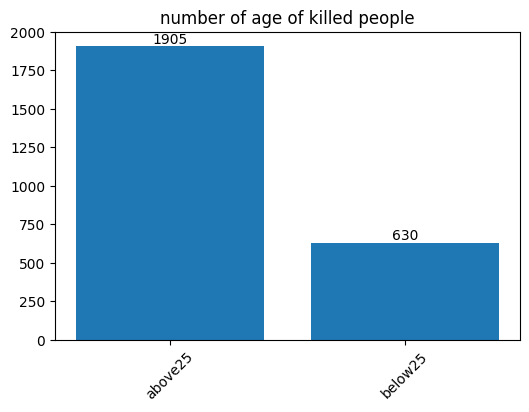

In [237]:
# with matplotlib

fig, ax = plt.subplots(figsize=(6,4))
ax.bar(age_cat_value_index, age_cat_value)

for i in range(len(age_cat_value_index)):
        plt.text(i,age_cat_value[i],age_cat_value[i],  horizontalalignment='center',
     verticalalignment='bottom')
ax.set_title('number of age of killed people')

ax.set_xticklabels( age_cat_value_index, rotation=45 ) ;

plt.show()

## 4: Plot number of killed poeple by race"

In [238]:
killed_race = df.groupby('race')['race'].count().sort_values(ascending=False)
killed_race

race
W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [239]:
killed_race_index = df.groupby('race')['race'].count().sort_values(ascending=False).index
killed_race_index

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object', name='race')

In [240]:
# with matplotlib


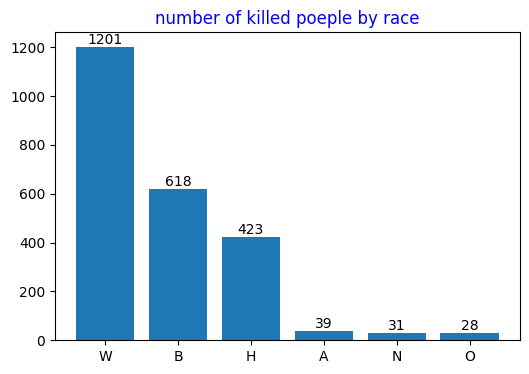

In [241]:
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(killed_race_index, killed_race)

for i in range(len(killed_race_index)):
        plt.text(i,killed_race[i],killed_race[i],  horizontalalignment='center',
     verticalalignment='bottom')
ax.set_title('number of killed poeple by race', color="b")

ax.set_xticklabels( killed_race_index, rotation=0 ) ;

plt.show()

## 5: Killed People According to Races (Pie Chart)

In [242]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [243]:
np.array(df["race"].value_counts(dropna=False).index)

array(['W', 'B', 'H', nan, 'A', 'N', 'O'], dtype=object)

In [244]:
df["race"].value_counts(dropna=False)

race
W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: count, dtype: int64

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [245]:
df.dropna(how='any', inplace=True)
df.shape

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [246]:
killed_race2 = df.groupby('race')['race'].count().sort_values(ascending=False)
killed_race2

race
W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [247]:
killed_race_index2 = df.groupby('race')['race'].count().sort_values(ascending=False).index
killed_race_index2

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object', name='race')

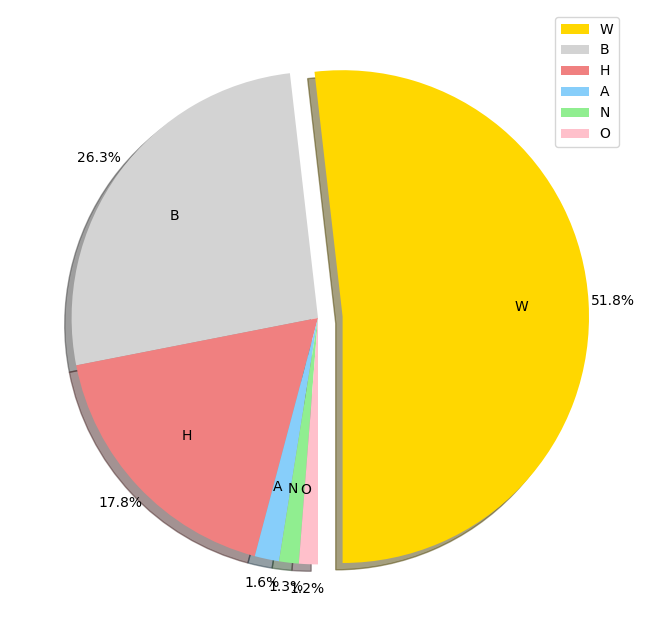

In [248]:
plt.figure(figsize=(10, 8))

colors_list = ['gold', 'lightgray', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0, 0] 

y = round((killed_race2 / killed_race2.sum()) * 100, 2)
mylabels = killed_race_index2

plt.pie(y, 
        labels = mylabels,
        labeldistance=0.7, 
        autopct="%.1f%%", 
        startangle=270, 
        shadow=True, 
        pctdistance=1.1, 
        colors=colors_list, 
        explode=explode_list)



plt.legend()
plt.show()

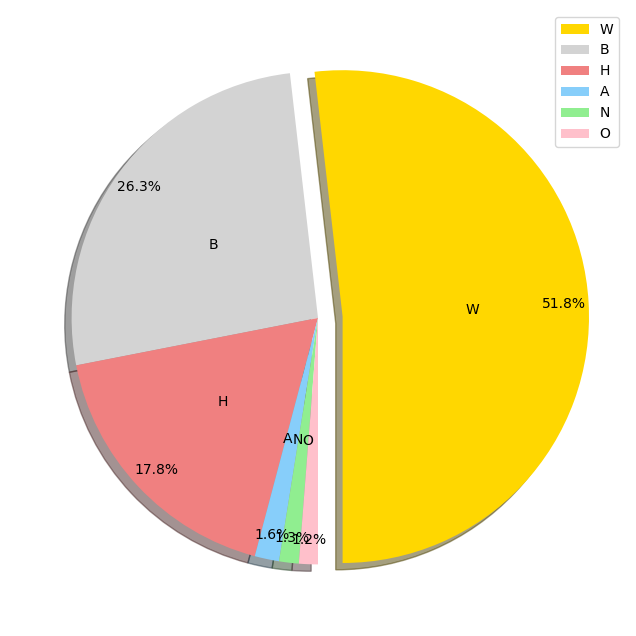

In [249]:
fig, ax = plt.subplots(figsize=(10, 8))

colors_list = ['gold', 'lightgray', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0, 0] 

y = round((killed_race2 / killed_race2.sum()) * 100, 2)
mylabels = killed_race_index2

ax.pie(y, 
        labels = mylabels,
        labeldistance=0.5, 
        autopct="%.1f%%", 
        startangle=270, 
        shadow=True, 
        pctdistance=0.9, 
        colors=colors_list, 
        explode=explode_list)

plt.legend()
plt.show()